In [1284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1285]:
df1=pd.read_csv('7k-delhi.csv')
df1.head(2)

,Unnamed: 0,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft
0,0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,28.608850,77.460560,3.0,3.0,NaN,Under Construction,New Property,NaN,NaN,2.0,NaN,Flat,\n\n\n Welcome ...,4148.148148
1,1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,28.374236,76.952416,3.0,3.0,NaN,Ready to Move,New Property,NaN,Semi-Furnished,2.0,NaN,Flat,\n\n\n Mapsko M...,5906.040268


In [1286]:
df2 = df1.drop(['Unnamed: 0', 'latitude','longitude','Balcony','Status','neworold','Furnished_status','Lift','Landmarks','desc'], axis=1)
df2.head(2)

,price,Address,area,Bedrooms,Bathrooms,parking,type_of_building,Price_sqft
0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,3.0,3.0,NaN,Flat,4148.148148
1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,3.0,3.0,NaN,Flat,5906.040268


In [1287]:
df2['Address'].value_counts().reset_index()

,Address,count
0,"Raj Nagar Extension, Ghaziabad, Delhi NCR",163
1,"Indirapuram, Ghaziabad, Delhi NCR",152
2,"Greater Noida West, Greater Noida, Delhi NCR",100
3,"Noida Extension, Noida, Delhi NCR",63
4,"NH 24, Ghaziabad, Delhi NCR",61
...,...,...
4140,"e block sector 57, Sector 57, Gurgaon, Delhi NCR",1
4141,"Ramakrishna apartment, Indraprastha Extension,...",1
4142,"Rajnagar Extension Gahziabad, Raj Nagar Extens...",1
4143,"Rajendra Park, Rajendra Park, Gurgaon, Delhi NCR",1


In [1288]:
dfl=pd.read_csv('locations.csv')
dfl.head(2)

,localityName,count
0,Patel Nagar,1448
1,Paschim Vihar,949


In [1289]:
def update_address(row):
    for location in dfl['localityName']:
        if isinstance(row['Landmarks'], str) and isinstance(row['Address'], str):
            if any(word.lower() in row['Landmarks'].lower() or word.lower() in row['Address'].lower() for word in location.split()):
                return location
    return row['Address']

# Apply the function to update addresses
df2['Address'] = df1.apply(update_address, axis=1)

In [1290]:
df2['Address'].value_counts().reset_index()

,Address,count
0,mayur vihar phase 1,969
1,Sector 12 Dwarka,532
2,Patel Nagar,357
3,New Ashok Nagar,245
4,Paschim Vihar,156
...,...,...
2240,"Laxman Vihar Phase 2, Laxman Vihar, Gurgaon, D...",1
2241,"Sector 85, Gurugram, Delhi NCR, Sector 85, Gur...",1
2242,"plot no.13 internal road sector 52 gurgaon, Se...",1
2243,"wz 20 bhagwan dass nagar extn, Bhagwan Das Nag...",1


In [1291]:
df2.head()

,price,Address,area,Bedrooms,Bathrooms,parking,type_of_building,Price_sqft
0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,3.0,3.0,NaN,Flat,4148.148148
1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,3.0,3.0,NaN,Flat,5906.040268
2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,4.0,5.0,1.0,Flat,6918.238994
3,3810000.0,mayur vihar phase 1,1050.0,2.0,2.0,1.0,Flat,3628.571429
4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,2.0,2.0,1.0,Flat,4592.592593


In [1292]:
df3 = df2.fillna({'parking':0})
df3.head()

,price,Address,area,Bedrooms,Bathrooms,parking,type_of_building,Price_sqft
0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,3.0,3.0,0.0,Flat,4148.148148
1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,3.0,3.0,0.0,Flat,5906.040268
2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,4.0,5.0,1.0,Flat,6918.238994
3,3810000.0,mayur vihar phase 1,1050.0,2.0,2.0,1.0,Flat,3628.571429
4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,2.0,2.0,1.0,Flat,4592.592593


In [1293]:
df3['Bathrooms'].value_counts().reset_index()

,Bathrooms,count
0,2.0,5051
1,3.0,1907
2,4.0,551
3,5.0,138
4,6.0,44
5,7.0,21
6,8.0,12
7,9.0,10
8,10.0,4


In [1294]:
df3 = df3[df3.Bathrooms<7]

In [1295]:
df3['Bathrooms'].value_counts().reset_index()

,Bathrooms,count
0,2.0,5051
1,3.0,1907
2,4.0,551
3,5.0,138
4,6.0,44


In [1296]:
df3['Bedrooms'].value_counts().reset_index()

,Bedrooms,count
0,2.0,3525
1,3.0,3373
2,4.0,640
3,5.0,90
4,6.0,43
5,7.0,7
6,8.0,5
7,9.0,5
8,10.0,3


In [1297]:
df3 = df3[df3.Bedrooms<7]

In [1298]:
df3.groupby('parking')['parking'].agg('count')

parking
0.0       5085
1.0       1711
2.0        635
3.0        102
4.0         42
          ... 
787.0        1
804.0        1
835.0        1
1050.0       1
1406.0       1
Name: parking, Length: 66, dtype: int64

In [1299]:
df4 = df3[df3['parking'] <=10 ]

In [1300]:
def park(row):
    if row['parking'] != 0:
        return True
    else:
        return False

df4['parking'] = df4.apply(park, axis=1)

C:\Users\Sharda Prasad Maurya.LAPTOP-4MVRVONI\AppData\Local\Temp\ipykernel_23760\3726124550.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['parking'] = df4.apply(park, axis=1)


In [1301]:
df4['parking'].value_counts().reset_index()

,parking,count
0,False,5085
1,True,2526


In [1302]:
df4['type_of_building'].value_counts().reset_index()

,type_of_building,count
0,Flat,6134
1,Individual House,1477


In [1303]:
def park(row):
    if row['type_of_building'] == 'Flat':
        return True
    else:
        return False

df4['type_of_building'] = df4.apply(park, axis=1)

C:\Users\Sharda Prasad Maurya.LAPTOP-4MVRVONI\AppData\Local\Temp\ipykernel_23760\599530915.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['type_of_building'] = df4.apply(park, axis=1)


In [1304]:
df4['type_of_building'].value_counts().reset_index()

,type_of_building,count
0,True,6134
1,False,1477


In [1305]:
df5=df4
len(df5)

7611

In [1306]:
df5 = df5[~(df5.Bathrooms>(df5.Bedrooms+2))]

In [1307]:
len(df5)

7610

In [1308]:
df5['pricepbed'] = df5['price']/df5['Bedrooms']
df5['areapbed'] = df5['area']/df5['Bedrooms']

C:\Users\Sharda Prasad Maurya.LAPTOP-4MVRVONI\AppData\Local\Temp\ipykernel_23760\2846170325.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['pricepbed'] = df5['price']/df5['Bedrooms']
C:\Users\Sharda Prasad Maurya.LAPTOP-4MVRVONI\AppData\Local\Temp\ipykernel_23760\2846170325.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['areapbed'] = df5['area']/df5['Bedrooms']


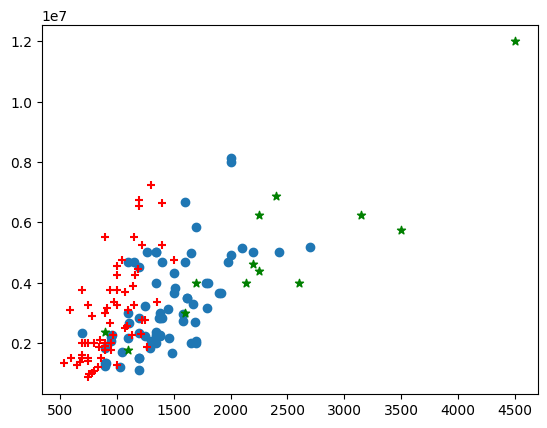

In [1309]:
def plott(location):
    dfx1 = df5[(df5.Address==location) & (df5.Bedrooms==3)]
    dfx2 = df5[(df5.Address==location) & (df5.Bedrooms==2)]
    dfx3 = df5[(df5.Address==location) & (df5.Bedrooms==4)]
    plt.scatter(dfx1.area,dfx1['pricepbed'])
    plt.scatter(dfx2.area,dfx2['pricepbed'], marker='+',color='r')
    plt.scatter(dfx3.area,dfx3['pricepbed'], marker='*',color='g')

plott('Paschim Vihar')

In [1310]:
    for x in range(2, 7):
        if x==2:
            z=df5[df5['Bedrooms']==2]
            y=np.mean(z['pricepbed'])
            w=np.std(z['pricepbed'])
            dff=z[z['pricepbed']<(y+(0.9*w))]        
            print(x,'z=',z.shape,'e=',dff.shape)
        else:
            q=df5[df5['Bedrooms']==x]
            y=np.mean(q['pricepbed'])
            w=np.std(q['pricepbed'])
            e=q[(q['pricepbed']<(y+(0.9*w))) & (q['pricepbed']>(y-(0.9*w)))]
            # print(e.unique())
            dff = pd.concat([dff,e],axis=0)
            print(x,'z=',q.shape,'e=',e.shape)
            # if x==3:
            #     print(q)
        print(x,y)
        
dff.shape

2 z= (3491, 10) e= (2939, 10)
2 2458627.900315096
3 z= (3347, 10) e= (2625, 10)
3 2997669.5548252165
4 z= (639, 10) e= (448, 10)
4 4348149.45226917
5 z= (90, 10) e= (62, 10)
5 5905555.555555556
6 z= (43, 10) e= (23, 10)
6 3808914.72868217


(6097, 10)

In [1311]:
df7=dff

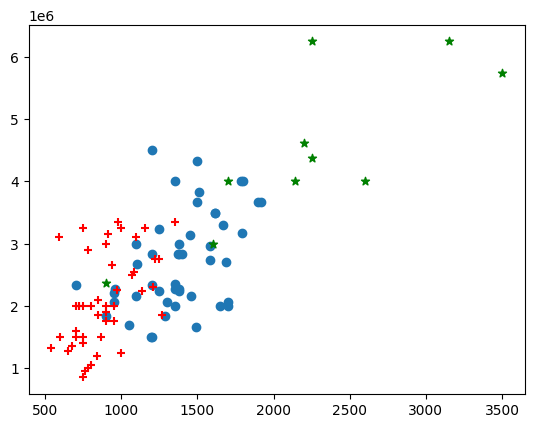

In [1312]:
def plott(location):
    dfx1 = df7[(df7.Address==location) & (df7.Bedrooms==3)]
    dfx2 = df7[(df7.Address==location) & (df7.Bedrooms==2)]
    dfx3 = df7[(df7.Address==location) & (df7.Bedrooms==4)]
    plt.scatter(dfx1.area,dfx1['pricepbed'])
    plt.scatter(dfx2.area,dfx2['pricepbed'], marker='+',color='r')
    plt.scatter(dfx3.area,dfx3['pricepbed'], marker='*',color='g')

plott('Paschim Vihar')

(array([3.006e+03, 2.582e+03, 4.100e+02, 8.600e+01, 1.000e+01, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 2100.        ,  4667.77777778,  7235.55555556,  9803.33333333,
        12371.11111111, 14938.88888889, 17506.66666667, 20074.44444444,
        22642.22222222, 25210.        , 27777.77777778]),
 <BarContainer object of 10 artists>)

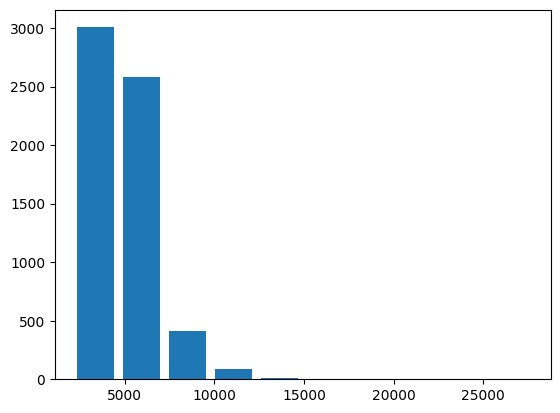

In [1313]:
import matplotlib.pyplot as plt

plt.hist(df7['Price_sqft'],rwidth=0.8)

In [1314]:
ppsstd = np.std(df7.Price_sqft)
ppsmean = np.mean(df7.Price_sqft)

df7 = df7[(df7.Price_sqft>(ppsmean-(2*ppsstd)))&(df7.Price_sqft<(ppsmean+(2*ppsstd)))]
len(df7)

5809

In [1315]:
df8=df7

(array([3163., 1688.,  705.,  148.,   51.,   23.,   17.,    4.,    6.,
           4.]),
 array([ 1700000.        ,  5550000.        ,  9400000.        ,
        13250000.        , 17100000.        , 20950000.        ,
        24799999.99999999, 28649999.99999999, 32499999.99999999,
        36349999.99999999, 40199999.99999999]),
 <BarContainer object of 10 artists>)

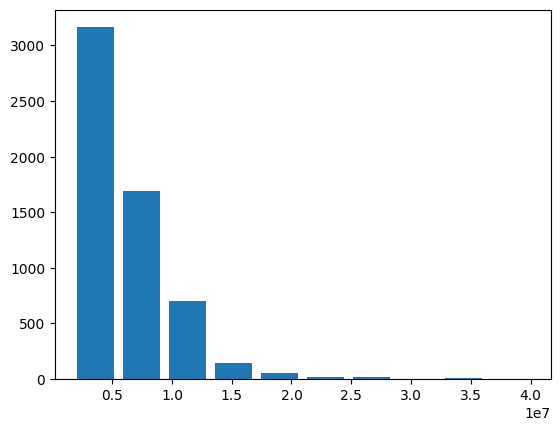

In [1316]:
plt.hist(df8['price'],rwidth=0.8)

In [1317]:
pricestd = np.std(df7.price)
pricemean = np.mean(df7.price)

df8 = df8[(df8.price>(pricemean-(2*pricestd)))&(df8.price<(pricemean+(2*pricestd)))]
len(df7)

5809

In [1318]:
dfb = df7['Address'].value_counts().reset_index()
dfb

,Address,count
0,mayur vihar phase 1,681
1,Sector 12 Dwarka,345
2,Patel Nagar,240
3,"Raj Nagar Extension, Ghaziabad, Delhi NCR",133
4,"Indirapuram, Ghaziabad, Delhi NCR",133
...,...,...
1732,"New Brij Puri, New Delhi - East, Delhi NCR",1
1733,"Shree Balaji Enclave, Shahberi, Greater Noida,...",1
1734,"Abhay Khand 4, Abhay Khand, Ghaziabad, Delhi NCR",1
1735,"B-205, Star rameshwaram flats, Raj Nagar Exten...",1


In [1319]:
dfb = dfb[dfb['count'] <=5 ]
df7['Address'] =  df7['Address'].apply(lambda x: 'other' if x in dfb['Address'].values else x)

C:\Users\Sharda Prasad Maurya.LAPTOP-4MVRVONI\AppData\Local\Temp\ipykernel_23760\2673474846.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df7['Address'] =  df7['Address'].apply(lambda x: 'other' if x in dfb['Address'].values else x)


In [1320]:
df7['Address'].value_counts().reset_index()

,Address,count
0,other,2106
1,mayur vihar phase 1,681
2,Sector 12 Dwarka,345
3,Patel Nagar,240
4,"Raj Nagar Extension, Ghaziabad, Delhi NCR",133
...,...,...
137,"Greater Noida West, Greater Noida, Greater Noi...",6
138,"Sector 6 Vaishali, Ghaziabad, Delhi NCR",6
139,"Sector 73, Noida, Delhi NCR",6
140,Defence Colony,6


In [1321]:
dummies = pd.get_dummies(df7['Address'])

In [1322]:
X = pd.concat([df7.drop({'Address','price','Price_sqft','pricepbed','areapbed'}, axis=1),dummies.drop('other',axis=1)], axis=1)

In [1323]:
X

,area,Bedrooms,Bathrooms,parking,type_of_building,"Ahinsa Khand 2, Ghaziabad, Delhi NCR","Bhopura, Ghaziabad, Delhi NCR","Chander Nagar, Ghaziabad, Delhi NCR",Chattarpur,"Chi 5, Greater Noida, Delhi NCR",...,"Uttam Nagar, New Delhi - West, Delhi NCR","Vaibhav Khand, Ghaziabad, Delhi NCR","Vaishali, Ghaziabad, Delhi NCR","Vasundhara, Ghaziabad, Delhi NCR","Wave City, Ghaziabad, Delhi NCR","Yamuna Expressway, Greater Noida, Delhi NCR","Zeta 1, Greater Noida, Delhi NCR","Zeta 2, Greater Noida, Delhi NCR",laxmi nagar near metro station,mayur vihar phase 1
3,1050.0,2.0,2.0,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,1350.0,2.0,2.0,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,1150.0,2.0,2.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,890.0,2.0,2.0,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7,850.0,2.0,2.0,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4985,4500.0,6.0,6.0,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5302,2345.0,6.0,6.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5706,3000.0,6.0,4.0,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
6054,3000.0,6.0,6.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [1324]:
df8=df7

In [1325]:
y = df8['price']

In [1326]:
# X = df8.drop({'price','pricepbed','Price_sqft','areapbed'}, axis=1)

In [1327]:
len(X)

5809

In [1328]:
X.head()

,area,Bedrooms,Bathrooms,parking,type_of_building,"Ahinsa Khand 2, Ghaziabad, Delhi NCR","Bhopura, Ghaziabad, Delhi NCR","Chander Nagar, Ghaziabad, Delhi NCR",Chattarpur,"Chi 5, Greater Noida, Delhi NCR",...,"Uttam Nagar, New Delhi - West, Delhi NCR","Vaibhav Khand, Ghaziabad, Delhi NCR","Vaishali, Ghaziabad, Delhi NCR","Vasundhara, Ghaziabad, Delhi NCR","Wave City, Ghaziabad, Delhi NCR","Yamuna Expressway, Greater Noida, Delhi NCR","Zeta 1, Greater Noida, Delhi NCR","Zeta 2, Greater Noida, Delhi NCR",laxmi nagar near metro station,mayur vihar phase 1
3,1050.0,2.0,2.0,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,1350.0,2.0,2.0,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,1150.0,2.0,2.0,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,890.0,2.0,2.0,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7,850.0,2.0,2.0,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [1329]:
from sklearn.model_selection import cross_val_score, ShuffleSplit
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()

In [1330]:
cv= ShuffleSplit(n_splits=10, test_size = 0.2)
scores = cross_val_score(model2, X, y, cv=cv)

In [1331]:
print("Cross-validation scores:", scores)

# Print the mean and standard deviation of the scores
print("Mean cross-validation score:", np.mean(scores))
print("Standard deviation of cross-validation scores:", np.std(scores))

Cross-validation scores: [0.85068458 0.83703876 0.83774257 0.84221151 0.83392594 0.83784193
 0.84363673 0.82153275 0.85689219 0.8406401 ]
Mean cross-validation score: 0.840214706846431
Standard deviation of cross-validation scores: 0.009022347717682592


In [1332]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [1333]:
# model1 = Lasso(max_iter=10000)

In [1334]:
# cv2= ShuffleSplit(n_splits=10, test_size = 0.2)
# scores1 = cross_val_score(model1, X, y, cv=cv2)

In [1335]:
# print("Cross-validation scores:", scores1)

# # Print the mean and standard deviation of the scores
# print("Mean cross-validation score:", np.mean(scores1))
# print("Standard deviation of cross-validation scores:", np.std(scores1))

In [1336]:
def testing(X,y):
    models = {
        'lr':{
            'model':LinearRegression(),
            'params':{
                    'fit_intercept': [True, False],
                    # 'normalize': [True, False]
            }    
            },
        'lasso':{
            'model':Lasso(max_iter=10000),
            'params':{
                'selection':['random','cyclic']
                    }
                },
        'dt':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
                'splitter':['best','random']
            }
            
        }
    }
    bestp = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state = 0)
    for algo_name, algo_details in models.items():  # Unpack the key-value pair
        clf = GridSearchCV(algo_details['model'],algo_details['params'],cv = cv, return_train_score=False)
        clf.fit(X,y)
        bestp.append({
            'model' : algo_name,
            'score' : clf.best_score_,
            'params' : clf.best_params_
        })
    return pd.DataFrame(bestp)

In [1337]:
# dfcv = testing(X,y)

In [1338]:
# dfcv

In [1339]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=100)
model = LinearRegression()

In [1340]:
model.fit(Xtrain,ytrain)

LinearRegression()

In [1341]:
model.score(Xtest,ytest)

0.8813575397731062

In [1345]:
np.where(X.columns == 'Chattarpur')

(array([8], dtype=int64),)

In [1343]:
def predict(address,area,bedrooms,bathrooms,parking,type_of_building):
    loc = np.where(X.columns == address)[0][0]
    x = np.zeros(len(X.columns))

    x[0] = area
    x[1] = bedrooms
    x[2] = bathrooms
    x[3] = parking
    x[4] = type_of_building
    if loc>=0:
        x[loc]=True
    return model.predict([x])[0]

In [1360]:
predict('Zeta 1, Greater Noida, Delhi NCR',2000,3,3,1,1)

C:\Users\Sharda Prasad Maurya.LAPTOP-4MVRVONI\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


9074791.705353044

In [1362]:
import joblib

In [1363]:
joblib.dump(model, 'delhi_house_price_prediction')

['delhi_house_price_prediction']

In [1367]:
import json

columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))